# 第三部分：高维积分 —— 从平面到空间
## Part 3: Multivariable Integration — From Plane to Space

欢迎来到微积分探索的第三部分！在第二部分中，我们学习了如何通过定积分（“切片累加”）来计算一个变量产生的总量，例如曲线下的面积。现在，我们将这个强大的思想进行升维，进入迷人的三维乃至更高维度的世界。

Welcome to the third part of our calculus exploration! In Part 2, we learned how to calculate the total amount from a single variable's rate of change using definite integrals ("slicing and summing"), such as finding the area under a curve. Now, we will elevate this powerful idea to higher dimensions, entering the fascinating world of 3D and beyond.

### 3.1 多重积分: “切片累加”思想的升维
### Multiple Integrals: Upgrading the "Slicing and Summing" Idea

单变量的定积分是把一条线段切成无数小段，然后累加。多重积分则是将这个思想扩展到更高维度：
- **二重积分 (Double Integral)**: 把一个平面区域切成无数个小方块，然后累加，通常用于计算体积。
- **三重积分 (Triple Integral)**: 把一个三维实体切成无数个小立方体，然后累加，通常用于计算非均匀物体的质量。

The definite integral for a single variable involves slicing a line segment into countless small pieces and summing them up. Multiple integrals extend this concept to higher dimensions:
- **Double Integral**: Slices a planar region into countless small rectangles and sums them up, typically used to calculate volume.
- **Triple Integral**: Slices a 3D solid into countless small cubes and sums them up, typically used to calculate the mass of a non-uniform object.

#### 3.1.1 例子1：如何计算不规则山丘的体积？
#### Example 1: How to Calculate the Volume of an Irregular Hill?

**生活场景 (Real-world Scenario):** 我们如何估算一座由地势函数 `z = f(x, y)` 描述的小山丘的总土方量？这在地形测绘和工程建设中非常重要。

How can we estimate the total volume of earth in a small hill described by a terrain function `z = f(x, y)`? This is crucial in fields like surveying and civil engineering.

##### **第一步：提出问题与可视化 (Posing Questions & Visualization)**

**问题 (Question):** 我们知道如何计算规则形状（如长方体）的体积。但山丘的顶面是不规则的，该怎么办？
**思路 (Idea):** 我们可以借鉴定积分的“切片”思想，将其升级为“切块”。

We know how to calculate the volume of regular shapes like cuboids. But what if the top surface of the hill is irregular? The idea is to upgrade our "slicing" concept from definite integrals to "dicing".

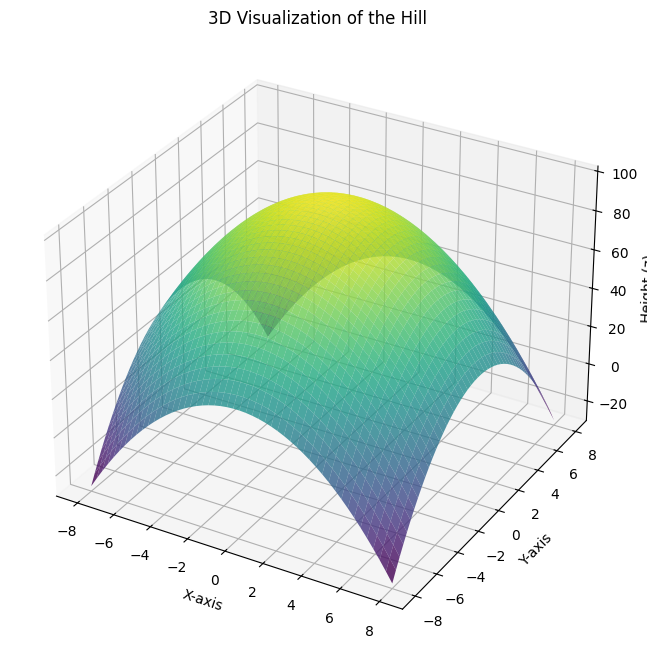

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义山丘的高度函数 z = f(x, y)
# Define the hill's height function z = f(x, y)
def terrain_func(x, y):
    return 100 - x**2 - y**2

# 创建数据点
# Create data points
x = np.linspace(-8, 8, 50)
y = np.linspace(-8, 8, 50)
X, Y = np.meshgrid(x, y)
Z = terrain_func(X, Y)

# 可视化3D山丘
# Visualize the 3D hill
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

ax.set_title('3D Visualization of the Hill')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Height (z)')
plt.show()
plt.close(fig) # 遵循指南，及时关闭图形，避免资源占用

##### **第二步：动手实验与探索 (Hands-on Experiment)**

**任务 (Task):** 将山丘脚下的地面 (`x-y` 平面) 划分成一个网格，就像一个棋盘。在每个小方格上，我们立一根方头“积木”（长方体），积木的高度就取山丘在那个方格中心点的高度 `f(x, y)`。所有这些积木堆叠在一起，就近似出了山丘的体积。这个过程就是**二重黎曼和 (Double Riemann Sum)**。

Let's divide the ground plane (the x-y plane) under the hill into a grid, like a chessboard. On each small square, we'll place a rectangular prism (a "block"), whose height is the hill's height at the center of that square, `f(x, y)`. The sum of the volumes of all these blocks approximates the hill's volume. This is called a **Double Riemann Sum**.

In [ ]:
import ipywidgets as widgets
from IPython.display import display

def plot_riemann_sum_3d(Nx=5, Ny=5):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    
    # 绘制平滑的山丘表面作为参考
    # Plot the smooth hill surface for reference
    x_surf = np.linspace(-5, 5, 100)
    y_surf = np.linspace(-5, 5, 100)
    X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
    Z_surf = terrain_func(X_surf, Y_surf)
    ax.plot_surface(X_surf, Y_surf, Z_surf, cmap='viridis', alpha=0.2)
    
    # 计算并绘制黎曼和的“积木”
    # Calculate and plot the Riemann sum "blocks"
    x_edges = np.linspace(-5, 5, Nx + 1)
    y_edges = np.linspace(-5, 5, Ny + 1)
    x_centers = (x_edges[:-1] + x_edges[1:]) / 2
    y_centers = (y_edges[:-1] + y_edges[1:]) / 2
    
    dx = x_edges[1] - x_edges[0]
    dy = y_edges[1] - y_edges[0]
    total_volume = 0
    
    for i in range(Nx):
        for j in range(Ny):
            x_c, y_c = x_centers[i], y_centers[j]
            z_c = terrain_func(x_c, y_c)
            if z_c > 0:
                ax.bar3d(x_edges[i], y_edges[j], 0, dx, dy, z_c, shade=True, color='c')
                total_volume += dx * dy * z_c
    
    ax.set_title(f'Double Riemann Sum (Nx={Nx}, Ny={Ny})\nApprox. Volume: {total_volume:.2f}')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Height (z)')
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.set_zlim(0, 120)
    plt.show()
    plt.close(fig)

# 创建交互式滑块
# Create interactive sliders
style = {'description_width': 'initial'}
Nx_slider = widgets.IntSlider(value=5, min=2, max=30, step=1, description='Grid divisions in X (Nx):', style=style)
Ny_slider = widgets.IntSlider(value=5, min=2, max=30, step=1, description='Grid divisions in Y (Ny):', style=style)

widgets.interactive(plot_riemann_sum_3d, Nx=Nx_slider, Ny=Ny_slider)

interactive(children=(IntSlider(value=5, description='Grid divisions in X (Nx):', max=30, min=2, style=SliderS…

**观察 (Observation):** 请拖动滑块，将 `Nx` 和 `Ny` 的值从 5 逐渐增加到 30。你会亲眼看到，随着网格越来越密（积木越来越细），这些积木堆的总和是如何越来越精确地“填满”山丘的真实体积，并且计算出的近似体积值会收敛到一个稳定的数值。

Drag the sliders to gradually increase the values of `Nx` and `Ny` from 5 to 30. You will see with your own eyes how the sum of the volumes of these blocks more and more accurately "fills" the true volume of the hill as the grid becomes finer (the blocks get thinner). The calculated approximate volume will converge to a stable value.

##### **第三步：抽象与定义 (Abstraction & Definition)**

**顿悟 (Insight):** 山丘的精确体积，就是当这些“积木”的底面积趋向于无穷小时，它们体积之和的**极限**。

The exact volume of the hill is the **limit** of the sum of the volumes of these blocks as their base area approaches zero.

**数学定义 (Mathematical Definition):** 这就是**二重积分 (Double Integral)** 的定义！它计算的是一个曲面 `f(x, y)` 在指定区域 `R` 上方所围成的体积。

This is the definition of a **Double Integral**! It calculates the volume enclosed by a surface `f(x, y)` over a specified region `R`.

$$ V = \iint_{R} f(x, y) dA = \int_{-5}^{5} \int_{-5}^{5} (100 - x^2 - y^2) dx dy $$

这里的 `dA` 就代表了那个无穷小的积木底面积 (`dx * dy`)。

Here, `dA` represents the infinitesimally small base area of the block (`dx * dy`).

##### **第四步：工具化与效率 (Introducing Efficient Tools)**

手动计算二重黎曼和非常繁琐。幸运的是，`scipy.integrate` 库提供了专门用于数值计算二重积分的强大工具 `dblquad`。它在后台做的就是比我们手动搭积木更高级、更快的近似计算。

Manually calculating double Riemann sums is tedious. Fortunately, the `scipy.integrate` library provides a powerful tool, `dblquad`, specifically for numerically calculating double integrals. Behind the scenes, it performs a much more sophisticated and faster approximation than our manual block-stacking.

In [3]:
from scipy import integrate

# 1. 定义山丘高度函数 z = f(x, y)
#    注意：scipy的dblquad函数参数顺序是 y, x
# 1. Define the hill's height function z = f(x, y)
#    Note: The argument order for scipy's dblquad is y, then x.
def terrain_func_scipy(y, x):
    return 100 - x**2 - y**2

# 2. 使用 dblquad 进行高效数值计算
#    参数分别为：被积函数, x下限, x上限, y下限, y上限
# 2. Use dblquad for efficient numerical calculation
#    The arguments are: integrand, x_min, x_max, y_min, y_max
volume, error = integrate.dblquad(terrain_func_scipy, -5, 5, -5, 5)

print(f"【数值解】山丘的体积约是 (The approximate volume of the hill is): {volume:.2f}")
print(f"计算误差约是 (The estimated error is): {error:.2e}")

【数值解】山丘的体积约是 (The approximate volume of the hill is): 8333.33
计算误差约是 (The estimated error is): 9.25e-11


**总结 (Conclusion):** 我们再次从“笨办法”（搭积木）出发，通过交互式探索直观地理解了二重积分的本质是“体素累加”，然后掌握了解决这类问题的标准数值计算工具 `scipy.integrate.dblquad`。

Once again, we started with a "brute-force" method (stacking blocks) to intuitively understand through interactive exploration that the essence of a double integral is "summing up volume elements." We then mastered the standard numerical tool for solving such problems, `scipy.integrate.dblquad`.

---

#### 3.1.2 例子2：计算密度不均的物体的总质量
#### Example 2: Calculating the Total Mass of an Object with Non-Uniform Density

**生活场景 (Real-world Scenario):** 想象一个金属部件，由于制造工艺的原因，其密度 `ρ(x, y, z)` 在不同位置是不同的。如何计算它的总质量？

Imagine a metal component whose density `ρ(x, y, z)` varies at different points due to the manufacturing process. How can we calculate its total mass?

**推理过程 (Reasoning):**
1.  我们将整个物体切成无数个无穷小的立方体，每个小立方体的体积是 `dV = dx dy dz`。
2.  对于每一个小立方体，由于它足够小，我们可以认为它的密度是均匀的，就是其中心点的密度 `ρ(x, y, z)`。
3.  因此，每个小立方体的质量是 `dM = ρ(x, y, z) * dV`。
4.  将所有这些小立方体的质量累加起来，就得到了总质量。这个过程就是**三重积分 (Triple Integral)**。

1. We slice the entire object into countless infinitesimally small cubes, each with volume `dV = dx dy dz`.
2. For each tiny cube, because it's so small, we can assume its density is uniform, equal to the density at its center, `ρ(x, y, z)`.
3. Therefore, the mass of each small cube is `dM = ρ(x, y, z) * dV`.
4. Summing up the masses of all these small cubes gives us the total mass. This process is a **Triple Integral**.

**数学表达式 (Mathematical Expression):**
假设密度函数为 (Assume the density function is): $$ \rho(x, y, z) = 5 + x^2 + y^2 + z^2 $$
假设物体 `B` 是一个单位立方体 (Assume the object `B` is a unit cube): `[0,1] x [0,1] x [0,1]`。
总质量 `M` 通过三重积分计算 (The total mass `M` is calculated via a triple integral):
$$ M = \iiint_{B} \rho(x, y, z) dV = \int_{0}^{1}\int_{0}^{1}\int_{0}^{1} (5 + x^2 + y^2 + z^2) dx dy dz $$

**工具化与效率 (Introducing Efficient Tools)**

与二重积分类似，`scipy.integrate` 提供了 `tplquad` 函数来高效地计算三重积分。

Similar to double integrals, `scipy.integrate` provides the `tplquad` function to efficiently compute triple integrals.

In [4]:
# 1. 定义密度函数 ρ(x, y, z)
#    注意：scipy的tplquad函数参数顺序是 z, y, x
# 1. Define the density function ρ(x, y, z)
#    Note: The argument order for scipy's tplquad is z, y, then x.
def density_func(z, y, x):
    return 5 + x**2 + y**2 + z**2

# 2. 使用 tplquad 进行计算
#    参数：被积函数, x范围, y范围, z范围
# 2. Calculate using tplquad
#    Arguments: integrand, x_range, y_range, z_range
mass, error = integrate.tplquad(density_func, 0, 1, 0, 1, 0, 1)

print(f"【数值解】物体的总质量是 (The total mass of the object is): {mass:.2f}")
print(f"计算误差约是 (The estimated error is): {error:.2e}")

【数值解】物体的总质量是 (The total mass of the object is): 6.00
计算误差约是 (The estimated error is): 8.13e-14


---

#### 3.1.3 例子3：计算不规则曲面的表面积
#### Example 3: Calculating the Surface Area of an Irregular Surface

**生活场景 (Real-world Scenario):** 还是那座山丘，现在我们不是要计算它的体积，而是要给它铺上草皮。由于山坡是倾斜的，草皮的实际面积（表面积）肯定比它在地面上的投影面积要大。我们需要精确计算这个表面积。

Let's return to our hill. This time, we don't want its volume, but we need to cover it with turf. Because the slopes are inclined, the actual area of the turf (the surface area) will be larger than its projected area on the ground. We need to calculate this surface area precisely.

**推理过程 (Reasoning):**

我们之前计算体积用的是“切块法”，但现在我们的目标不是计算物体的“胖瘦”，而是要计算它的“皮肤”有多大。这个过程是“微元求和”思想的再次升级。

Previously, we used a "dicing" method to calculate volume. But now, our goal isn't to measure how "bulky" an object is, but to determine the size of its "skin." This process is another upgrade of the "summing infinitesimal elements" idea.

**核心比喻：给山脉铺瓷砖 (The Core Analogy: Tiling a Mountain)**

**第一步：在平地上画网格 (Step 1: Draw a Grid on the Flat Ground)**
首先，我们看山脉的“影子”，即它在地图上的投影区域 `R`。我们在这个平坦的投影区域上画出非常密集的正方形网格。每个小方格的面积，我们称之为 `dA` (`dx * dy`)。

First, we look at the mountain's "shadow," its projection `R` on a flat map. We draw a very dense grid of squares on this flat area. The area of each small square is what we call `dA` (`dx * dy`).

**第二步：抬头看天，瓷砖变形了！(Step 2: Look Up, the Tile is Deformed!)**
现在，我们站在地面上一个 `dA` 的小方格里，抬头看正上方的山坡。山坡上对应的区域，才是我们要铺设的真实“瓷砖”，我们称之为 `dS`。一个关键问题出现了：这块山坡上的“瓷砖”`dS` 和我们脚下平地上的方格 `dA`，面积一样吗？显然，如果山坡是陡峭的，`dS` 就会被拉伸，面积会比 `dA` 大得多！

Now, stand in one of the small squares `dA` on the ground and look up at the corresponding patch of the slope above. This patch on the slope is the actual "tile" we need to lay, which we call `dS`. A key question arises: Is the area of this hillside tile `dS` the same as the flat square `dA` at our feet? Obviously, if the slope is steep, `dS` will be stretched and its area will be much larger than `dA`!

**第三步：计算“拉伸系数” (Step 3: Calculate the "Stretch Factor")**
计算机需要精确计算，在每一个点上，山坡到底把地面上的小方格“拉伸”了多少倍。这个“拉伸系数”取决于该点的陡峭程度，而陡峭程度由偏导数 `∂f/∂x` 和 `∂f/∂y` 决定。精确的“拉伸系数”公式是：

The computer needs to calculate exactly how much the slope "stretches" the small ground square at every point. This "stretch factor" depends on the steepness at that point, which is determined by the partial derivatives `∂f/∂x` and `∂f/∂y`. The exact formula for the stretch factor is:
$$ \text{Stretch Factor} = \sqrt{1 + (\frac{\partial f}{\partial x})^2 + (\frac{\partial f}{\partial y})^2} $$
所以，真实“瓷砖”的面积 `dS` 和它影子的面积 `dA` 的关系是： `dS = (Stretch Factor) × dA`。

So, the relationship between the area of the real "tile" `dS` and its shadow `dA` is: `dS = (Stretch Factor) × dA`.

**第四步：计算机的“铺砖”工作 (Step 4: The Computer's Tiling Job)**
现在计算机开始它的数值计算工作（曲面积分）。它遍历地面网格上的每一个小方格 `dA`，计算出该点的“拉伸系数”，从而得到对应“瓷砖” `dS` 的面积，最后将所有“瓷砖”的面积全部加起来，得到最终的总表面积。

Now the computer begins its numerical calculation (a surface integral). It iterates through every small square `dA` in the ground grid, calculates the "stretch factor" at that point to find the area of the corresponding "tile" `dS`, and finally sums up the areas of all the "tiles" to get the total surface area.

**数学表达式 (Mathematical Expression):**
山丘高度函数 (Hill height function): $$ z = f(x, y) = 100 - x^2 - y^2 $$
偏导数 (Partial derivatives):
$$ \frac{\partial f}{\partial x} = -2x $$
$$ \frac{\partial f}{\partial y} = -2y $$
总表面积 `A` 为二重积分 (Total surface area `A` is the double integral):
$$ A = \iint_{R} \sqrt{1 + (\frac{\partial f}{\partial x})^2 + (\frac{\partial f}{\partial y})^2} dA = \iint_{R} \sqrt{1 + (-2x)^2 + (-2y)^2} dA = \iint_{R} \sqrt{1 + 4x^2 + 4y^2} dA $$

In [4]:
# 1. 定义表面积积分的被积函数
#    注意参数顺序是 y, x
# 1. Define the integrand for the surface area integral
#    Note the argument order is y, x
def surface_area_integrand(y, x):
    return np.sqrt(1 + 4*x**2 + 4*y**2)

# 2. 设定积分区域（半径为5的圆形区域）
#    这里我们积分一个半径为sqrt(100)=10的圆形区域，因为当z=0时，x^2+y^2=100
# 2. Define the integration region (a circular region)
#    Here we integrate over a circular region of radius sqrt(100)=10, because when z=0, x^2+y^2=100.
surface_area, error = integrate.dblquad(
    surface_area_integrand, 
    -10, 
    10,
    lambda x: -np.sqrt(100 - x**2),
    lambda x: np.sqrt(100 - x**2)
)

print(f"【数值解】山丘的表面积约是 (The approximate surface area of the hill is): {surface_area:.2f}")

【数值解】山丘的表面积约是 (The approximate surface area of the hill is): 4203.98


**注意 (Note):** 在上面的代码中，积分的边界不再是简单的矩形 `[-10, 10]` 和 `[-10, 10]`。因为山丘的底座是一个圆形（当 `z=0` 时，`x² + y² = 100`），所以 `y` 的积分边界依赖于 `x`，即从 `-sqrt(100 - x²)` 到 `sqrt(100 - x²)`。`dblquad` 完美地支持了这种非矩形的积分区域。

In the code above, the integration bounds are no longer a simple rectangle. Because the base of the hill is a circle (`x² + y² = 100` when `z=0`), the integration bounds for `y` depend on `x`, running from `-sqrt(100 - x²)` to `sqrt(100 - x²)`). `dblquad` perfectly handles such non-rectangular integration regions.

# 课程总结
# Course Summary

恭喜你完成了高维积分的探索！通过本章的学习，你已经掌握了：
1.  **升维思想**: 如何将定积分“切片累加”的核心思想从一维扩展到二维（二重积分）和三维（三重积分）。
2.  **几何直觉**: 通过交互式可视化，你亲眼看到了二重黎曼和如何用“积木”逼近不规则物体的体积，从而建立了强大的几何直觉。
3.  **物理应用**: 理解了如何运用多重积分解决实际问题，例如计算不规则山丘的体积、密度不均物体的质量以及曲面的真实面积。
4.  **计算工具**: 掌握了使用 `scipy.integrate` 中的 `dblquad` 和 `tplquad` 函数作为高效的数值计算工具，来解决复杂的多重积分问题。

微积分的旅程充满了从具体问题到抽象概念，再回归到工具化解决问题的循环。希望这个系列能帮助你真正地“理解”并“应用”微积分，而不仅仅是记忆公式。继续探索吧！

Congratulations on completing your exploration of multivariable integration! Through this chapter, you have learned:
1.  **Dimensional Thinking**: How to extend the core idea of "slicing and summing" from one-dimensional definite integrals to two (double integrals) and three dimensions (triple integrals).
2.  **Geometric Intuition**: Through interactive visualizations, you've seen firsthand how double Riemann sums use "blocks" to approximate the volume of irregular solids, building a strong geometric intuition.
3.  **Physical Applications**: You understand how to apply multiple integrals to solve practical problems, such as calculating the volume of an irregular hill, the mass of an object with non-uniform density, and the true area of a surface.
4.  **Computational Tools**: You have mastered using the `dblquad` and `tplquad` functions from `scipy.integrate` as efficient numerical tools to solve complex multiple integral problems.

The journey of calculus is a cycle of moving from concrete problems to abstract concepts, and then back to solving problems with powerful tools. We hope this series has helped you to truly "understand" and "apply" calculus, not just memorize formulas. Keep exploring!